In [109]:
import ROOT as rt
import array as arr
import math

from strangehelper import get_parabola, make_mixed_corrections

In [110]:
# epsilon used to avoid bin edge nightmares (if you pick a value that lies on bin edge, it defaults to right bin)
EPSILON = 0.00001

In [131]:
LAMBDA_PT_LOW = 1 
LAMBDA_PT_HIGH = 8 - EPSILON

In [132]:
SIG_MIN = 1.104 
SIG_MAX = 1.129 - EPSILON

In [133]:
c = rt.TCanvas("main_canvas", "Main Canvas", 55, 55, 800, 700)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: main_canvas


In [134]:
input_file = rt.TFile("../online/two/AnalysisResults.root")
input_list = input_file.Get("h-lambda")

In [142]:
lambda_dist = input_list.FindObject("fAntiLambdaDist")
lambda_dist_no_bg = input_list.FindObject("fAntiLambdaDist_checkMC")
lambda_dist_mc = input_list.FindObject("fAntiLambdaDist_MC")

In [143]:
# Setting the associated Pt (this is never changed again)
lambda_dist.GetAxis(0).SetRangeUser(LAMBDA_PT_LOW, LAMBDA_PT_HIGH)
lambda_dist_no_bg.GetAxis(0).SetRangeUser(LAMBDA_PT_LOW, LAMBDA_PT_HIGH)
lambda_dist_mc.GetAxis(0).SetRangeUser(LAMBDA_PT_LOW, LAMBDA_PT_HIGH)

### Signal analysis section

In [144]:
# eta cuts first
lambda_dist.GetAxis(2).SetRangeUser(-0.8, 0.8)
lambda_dist_no_bg.GetAxis(2).SetRangeUser(-0.8, 0.8)
lambda_dist_mc.GetAxis(2).SetRangeUser(-0.8, 0.8)

In [145]:
lambda_mass_dist = lambda_dist.Projection(3).Clone("lambda_mass_dist")
lambda_mass_dist_nobg = lambda_dist_no_bg.Projection(3).Clone("lambda_mass_dist_no_bg")
lambda_mass_dist_mc = lambda_dist_mc.Projection(3).Clone("lambda_mass_mc")

In [146]:
lambda_pt_dist = lambda_dist.Projection(0).Clone("lambda_pt_dist")
lambda_pt_dist_nobg = lambda_dist_no_bg.Projection(0).Clone("lambda_pt_dist_no_bg")
lambda_pt_dist_mc = lambda_dist_mc.Projection(0).Clone("lambda_pt_mc")

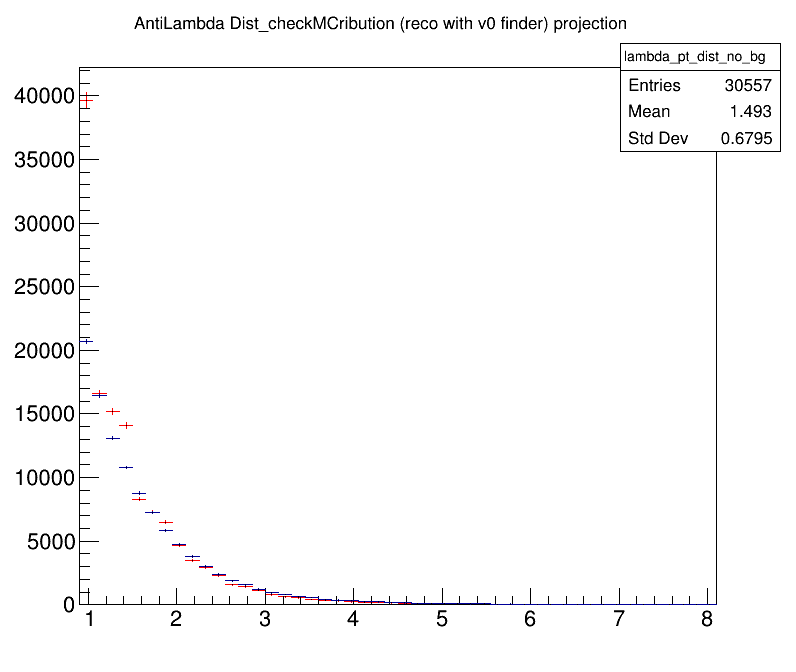

In [147]:
lambda_pt_dist_nobg.SetLineColor(rt.kRed)
lambda_pt_dist_nobg.Draw()
lambda_pt_dist_mc.Draw("SAME")
c.Draw()

In [119]:
lambda_mass_dist.SetTitle("#Lambda^{0} invariant mass distribution (p-#pi)")
lambda_mass_dist.Sumw2()
lambda_mass_dist.SetLineWidth(2)
lambda_mass_dist.GetXaxis().SetTitle("Mass (GeV/c^{2})")
lambda_mass_dist.GetYaxis().SetTitle("#frac{dN_{p-#pi}}{dM}")

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [120]:
lambda_mass_dist_mc.SetTitle("#Lambda^{0} invariant mass distribution in MC (p-#pi)")
lambda_mass_dist_mc.Sumw2()
lambda_mass_dist_mc.SetLineWidth(2)
lambda_mass_dist_mc.GetXaxis().SetTitle("Mass (GeV/c^{2})")
lambda_mass_dist_mc.GetYaxis().SetTitle("#frac{dN}{dM}")

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


21595.57100367546
24061.0


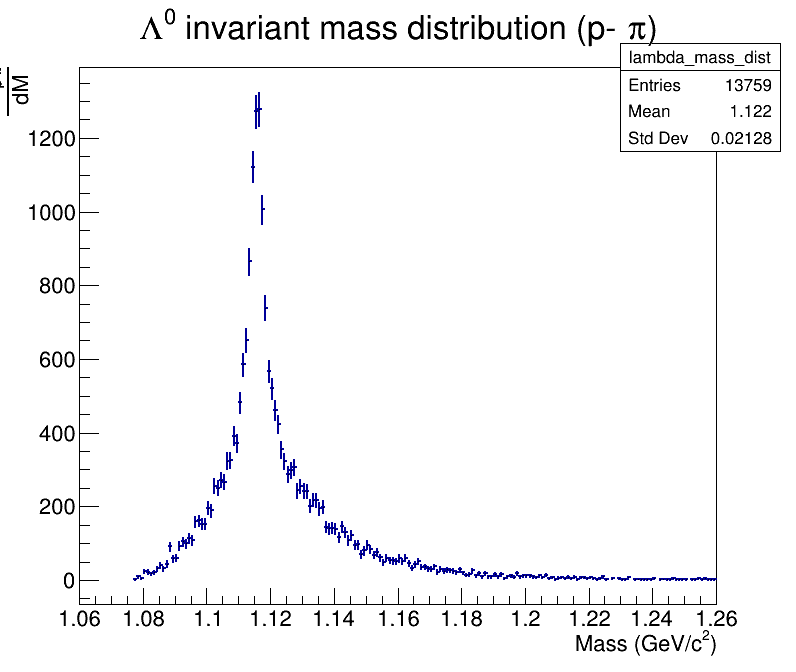

In [121]:
lambda_mass_dist_0_20.Draw()
print(lambda_mass_dist_0_20.Integral(0, lambda_mass_dist_0_20.GetNbinsX() + 1))
print(lambda_mass_dist_mc_0_20.Integral())
c.Draw()

In [84]:
bin_1 = lambda_mass_dist_0_20.FindBin(1.09)
bin_2 = lambda_mass_dist_0_20.FindBin(1.15)
bin_3 = lambda_mass_dist_0_20.FindBin(1.16 - EPSILON)
point_one = [1.09, lambda_mass_dist_0_20.GetBinContent(bin_1)]
point_two = [1.15, lambda_mass_dist_0_20.GetBinContent(bin_2)]
point_three = [1.16, lambda_mass_dist_0_20.GetBinContent(bin_3)]
bg_starting_params_0_20 = get_parabola(point_one, point_two, point_three)

In [85]:
lambda_mass_fit_0_20 = rt.TF1("lambda_mass_fit_0_20", "[0]*TMath::Voigt(x - [1], [2], [3], 4) + pol2(4)", 1.09, 1.155)
lambda_mass_fit_0_20.SetNpx(1000)
lambda_mass_fit_0_20.SetParameter(0, 1.36753e00)
lambda_mass_fit_0_20.SetParameter(1, 1.116)
lambda_mass_fit_0_20.SetParameter(2, 1.00576e-03)
lambda_mass_fit_0_20.SetParameter(3, 6.04166e-03)
lambda_mass_fit_0_20.SetParameter(4, bg_starting_params_0_20[0])
lambda_mass_fit_0_20.SetParameter(5, bg_starting_params_0_20[1])
lambda_mass_fit_0_20.SetParameter(6, bg_starting_params_0_20[2])

 FCN=270.975 FROM HESSE     STATUS=NOT POSDEF     50 CALLS         940 TOTAL
                     EDM=3.15295e-08    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.82089e+02   1.72575e+00   2.41911e-03  -3.41850e-06
   2  p1           1.11597e+00   6.53078e-06   2.66069e-07  -7.32412e+00
   3  p2           1.35724e-03   1.36129e-05   1.15033e-08   6.11700e+00
   4  p3           1.45538e-03   2.72875e-05   2.03759e-08  -6.57835e+00
   5  p4           1.22903e+05   1.71943e+02   2.93024e-02  -1.65521e-05
   6  p5          -2.44105e+05   1.64761e+02   5.81992e-02  -1.84079e-05
   7  p6           1.21283e+05   1.36703e+02   2.89162e-02  -2.04761e-05


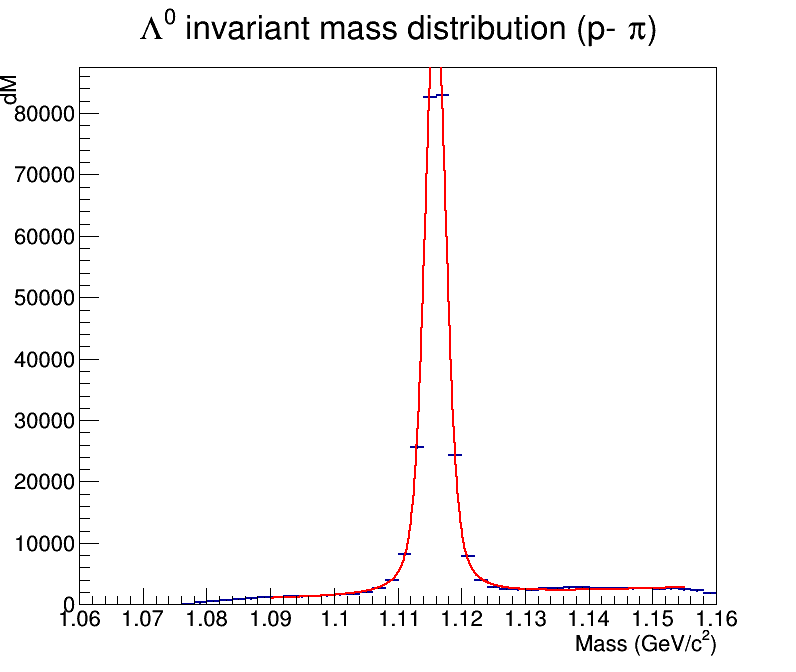

In [110]:
lambda_mass_dist_fit_0_20 = lambda_mass_dist_0_20.Clone("lambda_mass_dist_fit_0_20")
lambda_mass_dist_fit_0_20.Fit(lambda_mass_fit_0_20, "RS")
lambda_mass_dist_fit_0_20.Draw()
c.Draw()

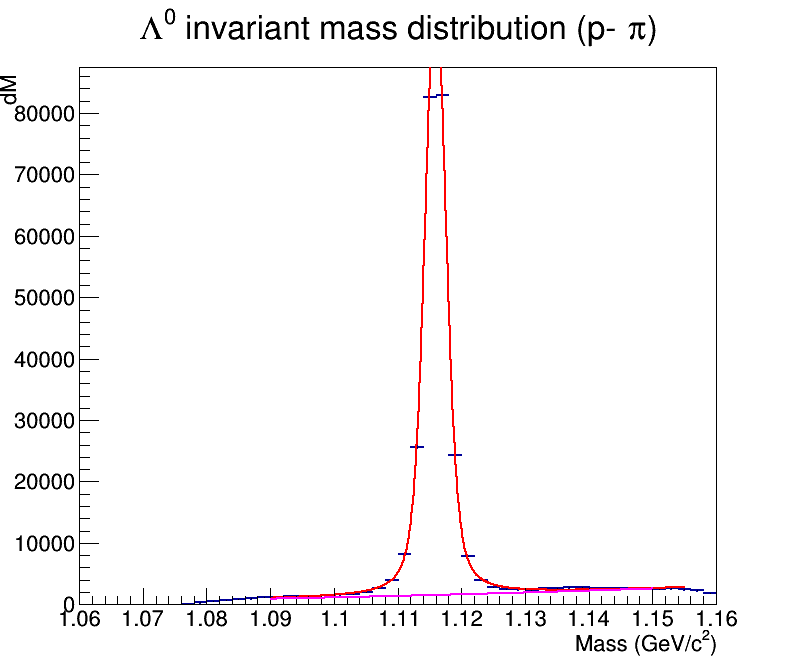

In [111]:
bg_fit_0_20 = rt.TF1("bg_fit_0_20", "pol2", 1.09, 1.15)
bg_fit_0_20.SetParameter(0, lambda_mass_fit_0_20.GetParameter(4))
bg_fit_0_20.SetParameter(1, lambda_mass_fit_0_20.GetParameter(5))
bg_fit_0_20.SetParameter(2, lambda_mass_fit_0_20.GetParameter(6))
bg_fit_0_20.SetNpx(1000)
bg_fit_0_20.SetLineColor(rt.kMagenta)
bg_fit_0_20.Draw("SAME")
c.Draw()

In [112]:
left_signal_bin_0_20 = lambda_mass_dist_fit_0_20.FindBin(SIG_MIN)
right_signal_bin_0_20 = lambda_mass_dist_fit_0_20.FindBin(SIG_MAX)

lambda_bg_0_20 = 0
lambda_total_0_20 = 0
for bin_num in range(left_signal_bin_0_20, right_signal_bin_0_20 + 1):
    bin_center = lambda_mass_dist_fit_0_20.GetBinCenter(bin_num)
    lambda_bg_0_20 += bg_fit_0_20.Eval(bin_center)
    lambda_total_0_20 += lambda_mass_dist_fit_0_20.GetBinContent(bin_num)

lambda_signal_0_20 = lambda_total_0_20 - lambda_bg_0_20
lambda_signal_total_ratio_0_20 = lambda_signal_0_20/lambda_total_0_20
lambda_signal_bg_ratio_0_20 = lambda_signal_0_20/lambda_bg_0_20
print(f"The 0-20 lambda signal is: {lambda_signal_0_20}")
print(f"The 0-20 lambda background is: {lambda_bg_0_20}")
print(f"The 0-20 lambda S/B is: {lambda_signal_bg_ratio_0_20}")
print(f"The 0-20 lambda S/T is: {lambda_signal_total_ratio_0_20}")
print(f"The 0-20 lambda significance is: {lambda_signal_0_20/math.sqrt(lambda_signal_0_20 + lambda_bg_0_20)}")

The 0-20 lambda signal is: 231909.84014286828
The 0-20 lambda background is: 20389.95894143748
The 0-20 lambda S/B is: 11.373727667080765
The 0-20 lambda S/T is: 0.9191836100724591
The 0-20 lambda significance is: 461.7009032629767
